## IMAGE BINARIZATION FOR HANDWRITING OCR

v4 USING f1 SCORE - Ross Kimberlin - 6/9/2022

(SEE https://github.com/ross-k/Image-Binarization-for-Handwriting-OCR/tree/ross-test/notebooks)

In [1]:
import cv2
import glob
import imageio as imi
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy import misc, ndimage
from scipy import misc, ndimage
from sklearn.metrics import accuracy_score, f1_score
#    classification_report, confusion_matrix, 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

%matplotlib inline

## STEP 1) READ IMAGES INTO PYTHON AND INSPECT

### H-DIBCO DATA SET

In [20]:
read_dir_DIBCO_2016_GT = '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/'

In [21]:
read_dir_DIBCO_2016    = '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/'

In [22]:
DIBCO_2016_GT   = []
DIBCO_2016_orig = []

for file in sorted(glob.glob(read_dir_DIBCO_2016_GT + '*.bmp'),
       key = lambda x: int((x.split('GT/')[1]).split('_gt')[0])):

    # CHANGING TO GRAYSCALE
    DIBCO_2016_GT.append(cv2.imread(file,
                                    cv2.IMREAD_GRAYSCALE))
    
for file in sorted(glob.glob(read_dir_DIBCO_2016 + '*.bmp'),
       key = lambda x: int((x.split('_dataset/')[1]).split('.bmp')[0])):

    # CHANGING TO GRAYSCALE
    DIBCO_2016_orig.append(cv2.imread(file,
                                      cv2.IMREAD_GRAYSCALE))

In [23]:
sorted(glob.glob(read_dir_DIBCO_2016_GT + '*.bmp'),
       key = lambda x: int((x.split('GT/')[1]).split('_gt')[0]))

['../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/1_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/2_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/3_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/4_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/5_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/6_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/7_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/8_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/9_gt.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_Dataset_GT/10_gt.bmp']

In [24]:
sorted(glob.glob(read_dir_DIBCO_2016 + '*.bmp'),
       key = lambda x: int((x.split('_dataset/')[1]).split('.bmp')[0]))

['../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/1.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/2.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/3.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/4.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/5.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/6.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/7.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/8.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/9.bmp',
 '../data/H-DIBCO_data/DIBCO/2016/DIPCO2016_dataset/10.bmp']

## STEP 2) TRAINING

#### USING DIBCO DATA FIRST

In [25]:
X_train_D, X_test_D, y_train_D, y_test_D = train_test_split(DIBCO_2016_orig,
                                                            DIBCO_2016_GT,
                                                            train_size = 0.75,
                                                            test_size = 0.25,
                                                            random_state = 321)

#### MICHAEL SAYS THAT AN f1 SCORE WILL WORK BETTER WHEN THERE ARE MORE BACKGROUND THAN FOREGROUND PIXELS, AND THAT GALLEGO & CALVO-ZARAGOZA SAY THAT A LARGER WINDOW SIZE SEEMS TO PRODUCE A BETTER f1 SCORE.

In [26]:
def f1_score_D(thresh):
   
    f1_DIBCO = []

    for ground_truth, original in zip(y_train_D, X_train_D):
        
        # KEEPS THE SECOND ELEMENT OF A TUPLE
        _, predicted = cv2.threshold(original,
                                     thresh, 255, 
                                     cv2.THRESH_BINARY)
        
        # COMPUTE ACCURACY SCORES ACROSS TRAINING DATA
        f1_DIBCO.append(accuracy_score(ground_truth.flatten(),
                                       predicted.flatten()))
    
    # AVERAGE ACCURACY SCORES
    return np.mean(f1_DIBCO) 

In [27]:
f1_score_D(160)

0.9455660141669453

In [28]:
f1_cont_D = []

for thresh in range(0, 255):
    
    f1_cont_D.append(f1_score_D(thresh))

In [29]:
np.asarray(f1_cont_D).max()

0.9719764300186599

In [30]:
np.asarray(f1_cont_D).argmax()

121

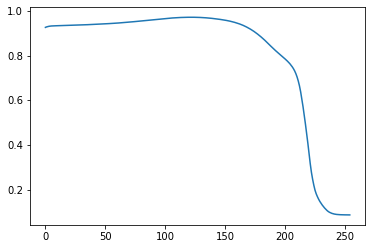

In [31]:
plt.plot(f1_cont_D);

### TO DO - CREATE FUNCTION TO ALTER ARRAYS

-- SEE GALLEGO, utilDataGenerator.py - https://github.com/ajgallego/document-image-binarization/blob/master/binarize/utilDataGenerator.py

In [14]:
# img = DIBCO_orig # [0]
# img

In [32]:
window_size = 64

In [17]:
# img[0:window_size, 
#     0:window_size ]

In [ ]:
# img[0:window_size, 
#     0:window_size ].shape

In [ ]:
# plt.imshow(img[0:window_size, 
#                0:window_size, ]);

In [ ]:
# img.shape

In [33]:
def arr_div(img):

    cont = []
    
    idx_row_start_n = 0
    idx_col_start_n = 0
    
    im_size = img.shape
    
    # // GIVES YOU INTEGER DIVISION
    n_windows_tall = im_size[0] // window_size
    n_windows_wide = im_size[1] // window_size
    
    for idx_row_start_n in range(n_windows_tall):
    
        for idx_col_start_n in range(n_windows_wide):
            
            window = img[window_size * idx_row_start_n: \
                             window_size * (idx_row_start_n + 1), 
                         window_size * idx_col_start_n: \
                             window_size * (idx_col_start_n + 1)]
    
            window = np.divide(window, 255)
        
            cont.append(window)
    
    return cont

In [34]:
X = []

for img in DIBCO_2016_orig:
    
    # extend CREATES ONE LONG LIST INSTEAD OF SEVERAL LISTS
    X.extend(arr_div(img))

In [35]:
X = np.array(X)

In [36]:
y = []

for img in DIBCO_2016_GT:
    
    # CREATES ONE LONG LIST INSTEAD OF SEVERAL LISTS
    y.extend(arr_div(img))

In [37]:
y = np.array(y)

In [38]:
window = arr_div(img)

In [39]:
window

[array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]),
 array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]),
 array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]),
 array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]),
 arr

In [ ]:
# img_GT = DIBCO_GT[0]

In [26]:
# arr_div(img_GT)

In [40]:
len(X)

2979

In [41]:
X[0].shape

(64, 64)

### STEP 3) KERAS MODEL - THE MOMENT YOU HAVE BEEN WAITING FOR

#### OUR FIRST ATTEMPT IS GOING TO THREE NETWORK LAYERS.

In [42]:
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape = (window_size, window_size, 1)),
        tf.keras.layers.Conv2D(32, 
                               kernel_size=(3, 3),
                               strides = 1,
                               padding = 'same'),
        tf.keras.layers.BatchNormalization(axis = 1),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(32, 
                               kernel_size=(3, 3),
                               strides = 1,
                               padding = 'same'),
        tf.keras.layers.BatchNormalization(axis = 1),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(32, 
                               kernel_size=(3, 3),
                               strides = 1,
                               padding = 'same'),                       
        tf.keras.layers.BatchNormalization(axis = 1),
        tf.keras.layers.Activation('relu'),      
        tf.keras.layers.Conv2DTranspose(32, 
                               kernel_size=(3, 3),
                               strides = 1,
                               padding = 'same'),
        tf.keras.layers.BatchNormalization(axis = 1),
        tf.keras.layers.Activation('relu'),                       
        tf.keras.layers.Conv2DTranspose(32, 
                               kernel_size=(3, 3),
                               strides = 1,
                               padding = 'same'),
        tf.keras.layers.BatchNormalization(axis = 1),
        tf.keras.layers.Activation('relu'), 
        tf.keras.layers.Conv2DTranspose(32, 
                               kernel_size=(3, 3),
                               strides = 1,
                               padding = 'same'),
        tf.keras.layers.BatchNormalization(axis = 1),
        tf.keras.layers.Activation('relu'), 
        tf.keras.layers.Conv2D(1, 
                               kernel_size=(3, 3), 
                               strides=1, 
                               padding='same', 
                               activation='sigmoid')                     
    ]
)

model.summary()

model.compile('rmsprop', 
              'binary_crossentropy')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        320       
                                                                 
 batch_normalization_6 (Batc  (None, 64, 64, 32)       256       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 64, 64, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 batch_normalization_7 (Batc  (None, 64, 64, 32)       256       
 hNormalization)                                                 
                                                                 
 activation_7 (Activation)   (None, 64, 64, 32)       

In [43]:
model.fit(X, y,
          epochs = 10)

Epoch 1/10
94/94 [==============================] - 68s 711ms/step - loss: 0.0877
Epoch 2/10
94/94 [==============================] - 67s 708ms/step - loss: 0.0464
Epoch 3/10
94/94 [==============================] - 66s 700ms/step - loss: 0.0401
Epoch 4/10
94/94 [==============================] - 66s 699ms/step - loss: 0.0372
Epoch 5/10
94/94 [==============================] - 66s 699ms/step - loss: 0.0362
Epoch 6/10
94/94 [==============================] - 66s 700ms/step - loss: 0.0332
Epoch 7/10
94/94 [==============================] - 66s 701ms/step - loss: 0.0324
Epoch 8/10
94/94 [==============================] - 66s 700ms/step - loss: 0.0308
Epoch 9/10
94/94 [==============================] - 67s 709ms/step - loss: 0.0300
Epoch 10/10
94/94 [==============================] - 68s 722ms/step - loss: 0.0314


In [44]:
predictions = model.predict(X)

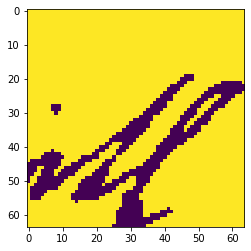

In [46]:
plt.imshow(y[-1])

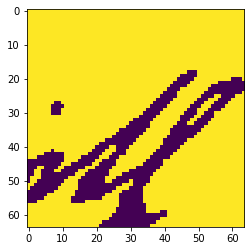

In [47]:
plt.imshow(predictions[- 1] > 0.5)

In [48]:
predictions.max()

1.0

In [49]:
predictions.min()

2.748649e-09

In [50]:
len(y_test_D)

3

In [51]:
len(y)

2979

In [52]:
len(X_test_D)

3

In [53]:
len(predictions)

2979

In [54]:
print(f1_score(y, 
               predictions))

ValueError: unknown is not supported

## THEN STEP 5) FINISH TWEAKING PRE-PROCESSING & RE-ITERATE

#### (e.g. USE GAUSSIAN BLUR?  WHICH DE-NOISING, AND AFTER vs BEFORE, IMAGE SEGMENTATION, etc.)